### Análise do dataset

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Visualizando o CSV
df = pd.read_csv('/content/ds_salinity_vs_temp_raw.csv')
df.head()

/tmp/ipython-input-956737801.py:7: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ds_salinity_vs_temp_raw.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Verificando o tamanho do dataset
df.shape

(864863, 74)

In [30]:
# verificando a existência de valores nulos

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

,0
Cst_Cnt,0
Btl_Cnt,0
Sta_ID,0
Depth_ID,0
Depthm,0
...,...
TA1,862779
TA2,864629
pH2,864853
pH1,864779


In [31]:
#  selecionei as variáveis de interesse

df = df.rename(columns={
    "T_degC": "Temperatura_C",
    "Salnty": "Salinidade"
})

df = df[["Temperatura_C", "Salinidade"]]

df.head()


,Temperatura_C,Salinidade
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [32]:
# Conferindo valores que possam ser suspeitos (farenheit)
suspeitos = df[df['Temperatura_C'] > 60]  # exemplo: temperatura maior que 60°C
print(suspeitos[['Temperatura_C']].head())


Empty DataFrame
Columns: [Temperatura_C]
Index: []


Não retornou nada, o que indica que a temperatura está em graus celsius

In [33]:
# Verifica valores nulos por coluna
print(df.isnull().sum())

# Se quiser ver também a porcentagem de nulos
print((df.isnull().mean() * 100).round(2))


Temperatura_C    10963
Salinidade       47354
dtype: int64
Temperatura_C    1.27
Salinidade       5.48
dtype: float64


In [34]:
df.describe()


,Temperatura_C,Salinidade
count,853900.000000,817509.000000
mean,10.799677,33.840350
std,4.243825,0.461843
min,1.440000,28.431000
25%,7.680000,33.488000
50%,10.060000,33.863000
75%,13.880000,34.196900
max,31.140000,37.034000


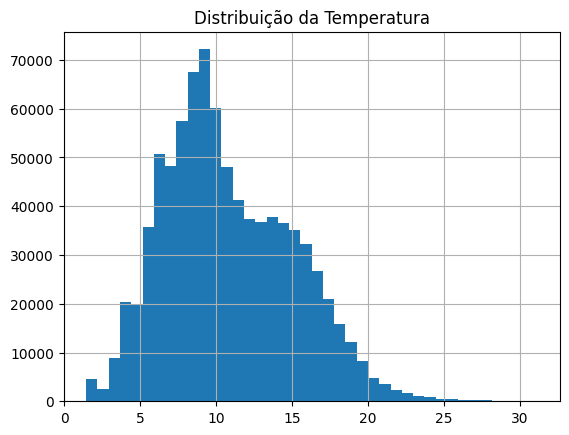

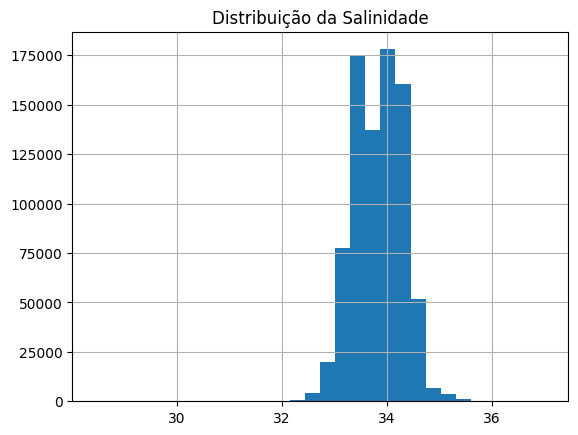

In [35]:
# Verificando Distribuição da Temperatura e da Salinidade

df["Temperatura_C"].hist(bins=40)
plt.title("Distribuição da Temperatura")
plt.show()

df["Salinidade"].hist(bins=30)
plt.title("Distribuição da Salinidade")
plt.show()


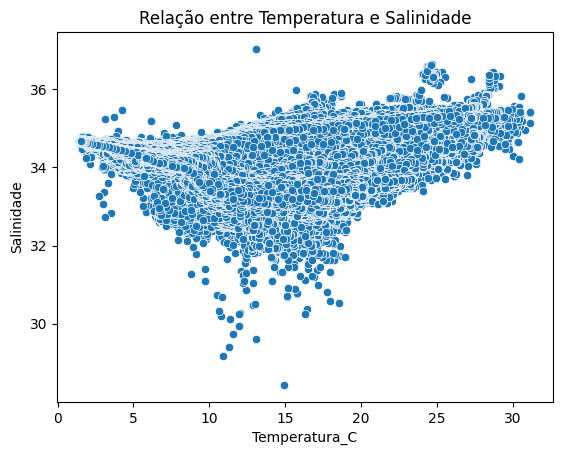

In [36]:
# Verificando Relação entre Temperatura e Salinidade

sns.scatterplot(x="Temperatura_C", y="Salinidade", data=df)
plt.title("Relação entre Temperatura e Salinidade")
plt.show()


In [37]:
print(df[['Temperatura_C','Salinidade']].corr())
# É uma correlação negativa moderada: quando a temperatura aumenta, a salinidade tende a diminuir.
# O que ficou incorreto, pois no gráfico mostra que a salinidade passa a aumentar novamente depois.

               Temperatura_C  Salinidade
Temperatura_C       1.000000   -0.505266
Salinidade         -0.505266    1.000000


In [38]:
# Voltando para o dataset original e utilizando mais variáveis.
df = pd.read_csv('/content/ds_salinity_vs_temp_raw.csv')


df = df.rename(columns={
    "T_degC": "Temperatura_C",
    "Salnty": "Salinidade",
    "Depthm": "Profundidade_m",
    "O2ml_L": "O2_ml_L"
})

df = df[["Temperatura_C", "Salinidade", "Profundidade_m", "O2_ml_L"]]

df.head()

/tmp/ipython-input-366802592.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ds_salinity_vs_temp_raw.csv')


,Temperatura_C,Salinidade,Profundidade_m,O2_ml_L
0,10.50,33.440,0,NaN
1,10.46,33.440,8,NaN
2,10.46,33.437,10,NaN
3,10.45,33.420,19,NaN
4,10.45,33.421,20,NaN


### PRÉ-PROCESSAMENTO

In [39]:
# Verifica a porcentagem de valores nulos na coluna de oxigênio dissolvido

print(df['O2_ml_L'].isna().mean())

0.19501585800294383


In [40]:
# Remove linhas que tenham nulos em Temperatura ou Salinidade
df = df.dropna(subset=["Temperatura_C", "Salinidade"])

# Confere se ainda tem nulos
print(df.isnull().sum())


Temperatura_C          0
Salinidade             0
Profundidade_m         0
O2_ml_L           152758
dtype: int64


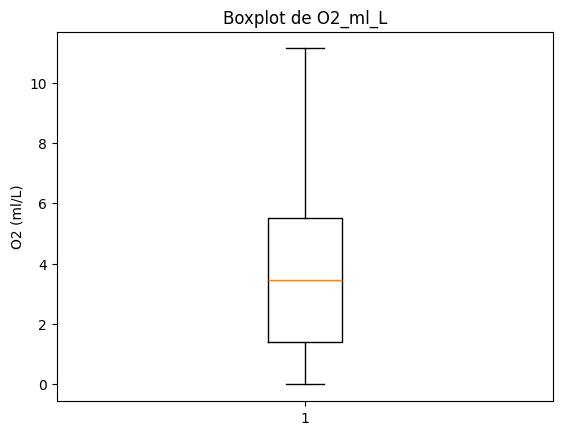

In [41]:
# Verificando se existem outliers na coluna de oxigênio dissolvido, para fazer o pré-processamento correto

plt.boxplot(df['O2_ml_L'].dropna())
plt.title("Boxplot de O2_ml_L")
plt.ylabel("O2 (ml/L)")
plt.show()



In [42]:
df.isna().sum()


,0
Temperatura_C,0
Salinidade,0
Profundidade_m,0
O2_ml_L,152758


In [43]:
# usando a mediana em valores nulos na coluna de oxigênio para não enviesar e nem distorcer o modelo com valores extremos.

df['O2_ml_L'] = df['O2_ml_L'].fillna(df['O2_ml_L'].median())
print(df.shape)


(814247, 4)


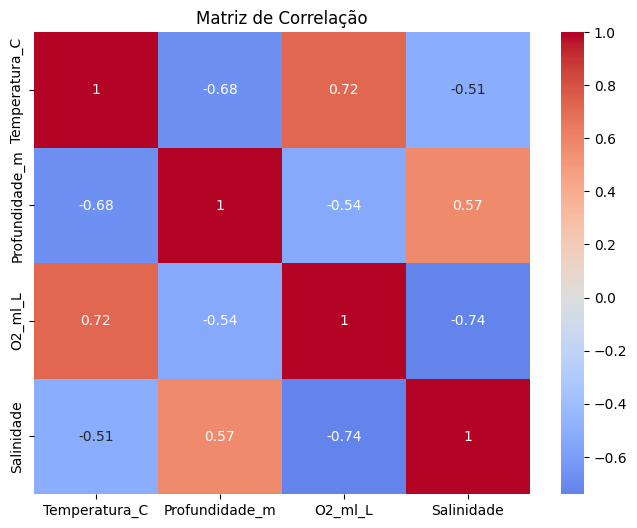

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Temperatura_C','Profundidade_m','O2_ml_L','Salinidade']].corr(),
            annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")
plt.show()

# Nesta matriz conseguimos identificar que o óxigênio dissolvido tem maior correlação com a salinidade


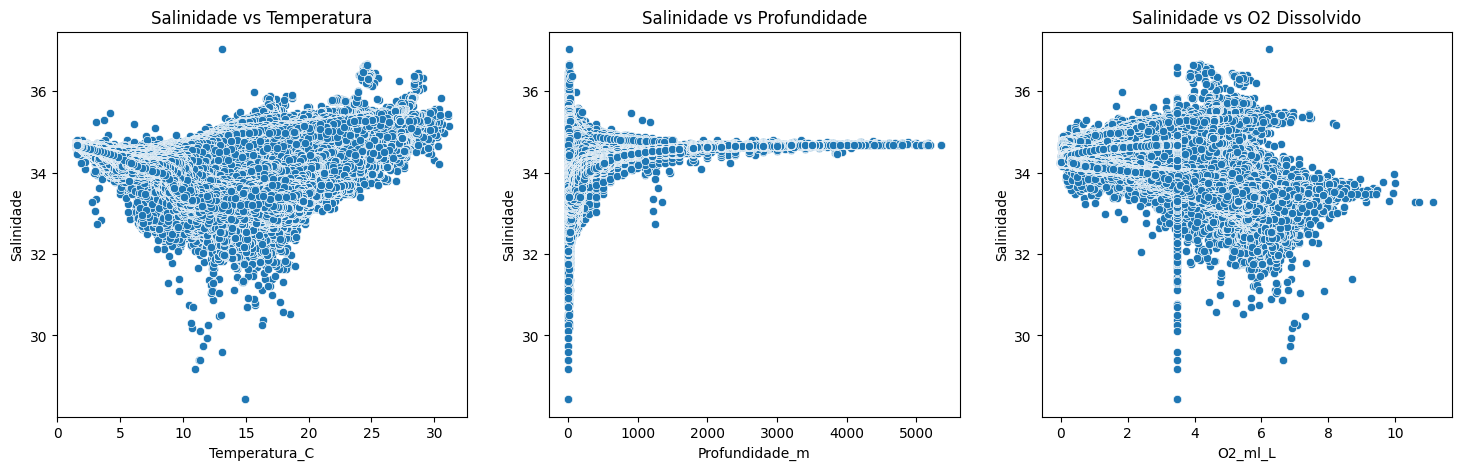

In [45]:
#Plotando gráficos de dispersão

fig, axs = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(data=df, x='Temperatura_C', y='Salinidade', ax=axs[0])
sns.scatterplot(data=df, x='Profundidade_m', y='Salinidade', ax=axs[1])
sns.scatterplot(data=df, x='O2_ml_L', y='Salinidade', ax=axs[2])

axs[0].set_title("Salinidade vs Temperatura")
axs[1].set_title("Salinidade vs Profundidade")
axs[2].set_title("Salinidade vs O2 Dissolvido")

plt.show()

#Esses gráficos de dispersão mostram:

# Grafíco 1:
# Salinidade vs Temperatura - Os pontos estão bem espalhados, sem uma tendência clara linear.
# A correlação foi -0.51, e o gráfico confirma: existe uma leve tendência de salinidade diminuir -
# - quando a temperatura aumenta, mas não é forte.
# Sozinha, a temperatura não deve explicar bem a salinidade

#======================================================================

# Gráfico 2:
# Isso combina com a correlação +0.55 → quanto maior a profundidade, maior a salinidade até certo ponto, mas depois fica estável.
# Isso indica que a relação pode ser não linear (uma curva que se achata no fundo).

#=======================================================================

# Gráfico 3:
# Aqui vemos uma relação negativa mais clara: quanto maior o O₂ dissolvido, menor a salinidade - A correlação foi -0.67, o que é forte
# Apesar da dispersão, há um padrão inclinado para baixo (salinidade cai com mais oxigênio).

### TREINAMENTO E TESTE

O dataset possui variáveis em escalas diferentes: por exemplo, oxigênio varia de 0 a 10, enquanto profundidade chega a 5000. Modelos de regressão linear são sensíveis a essas diferenças, e o StandardScaler é útil nesses casos, pois garante que todas as variáveis contribuam de forma justa durante o treinamento




O StandardScaler coloca todas essas variáveis na mesma base estatística:

média = 0

desvio padrão = 1

Treinamento/teste do modelo simples, apenas com oxigênio dissolvido como preditora, e o modelo múltiplo com mais variáveis trabalhadas no pré-processamento

In [46]:
# === 1. Preparando os dados ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# X com as variáveis preditoras
X_simple = df[['O2_ml_L']]  # modelo simples
X_multiple = df[['O2_ml_L', 'Profundidade_m', 'Temperatura_C']]  # modelo múltiplo
y = df['Salinidade']

# Divisão treino/teste
X_train_s, X_test_s, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)
X_train_m, X_test_m, _, _ = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

#  2. Pré-processamento (Scaler aplicado apenas nos modelos lineares)
scaler_s = StandardScaler()
X_train_s_scaled = scaler_s.fit_transform(X_train_s)
X_test_s_scaled = scaler_s.transform(X_test_s)

scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

# === 3. Modelos ===
# Regressão Linear Simples com scaler
lr_simple = LinearRegression()
lr_simple.fit(X_train_s_scaled, y_train)
y_pred_s = lr_simple.predict(X_test_s_scaled)

# Regressão Linear Múltipla com scaler
lr_multiple = LinearRegression()
lr_multiple.fit(X_train_m_scaled, y_train)
y_pred_m = lr_multiple.predict(X_test_m_scaled)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_m, y_train)
y_pred_rf = rf.predict(X_test_m)

# === 4. Avaliação ===
def avaliar_modelo(nome, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome}: R² = {r2:.3f} | RMSE = {rmse:.3f}")

avaliar_modelo("Linear Simples (O2)", y_test, y_pred_s)
avaliar_modelo("Linear Múltipla (O2 + Prof + Temp)", y_test, y_pred_m)
avaliar_modelo("Random Forest", y_test, y_pred_rf)


Linear Simples (O2): R² = 0.546 | RMSE = 0.311
Linear Múltipla (O2 + Prof + Temp): R² = 0.616 | RMSE = 0.286
Random Forest: R² = 0.812 | RMSE = 0.200


In [47]:
print("=== Quantidade de registros ===")
print(f"Treino (simples): {len(X_train_s)}")
print(f"Teste  (simples): {len(X_test_s)}")
print(f"Treino (múltiplo): {len(X_train_m)}")
print(f"Teste  (múltiplo): {len(X_test_m)}")


=== Quantidade de registros ===
Treino (simples): 651397
Teste  (simples): 162850
Treino (múltiplo): 651397
Teste  (múltiplo): 162850


### RESULTADOS E CONCLUSÃO

Os resultados acima mostram claramente que o Random forest teve um melhor desempenho:

R² = 0.812 → Isso significa que o modelo Random Forest explica 81,2% da variância dos dados, o que é melhor do que os modelos lineares.

Quanto mais próximo de 1, melhor o modelo está representando os dados.                                                                                                                                                         

 RMSE = 0.20 → Indica que o erro médio das previsões é menor.

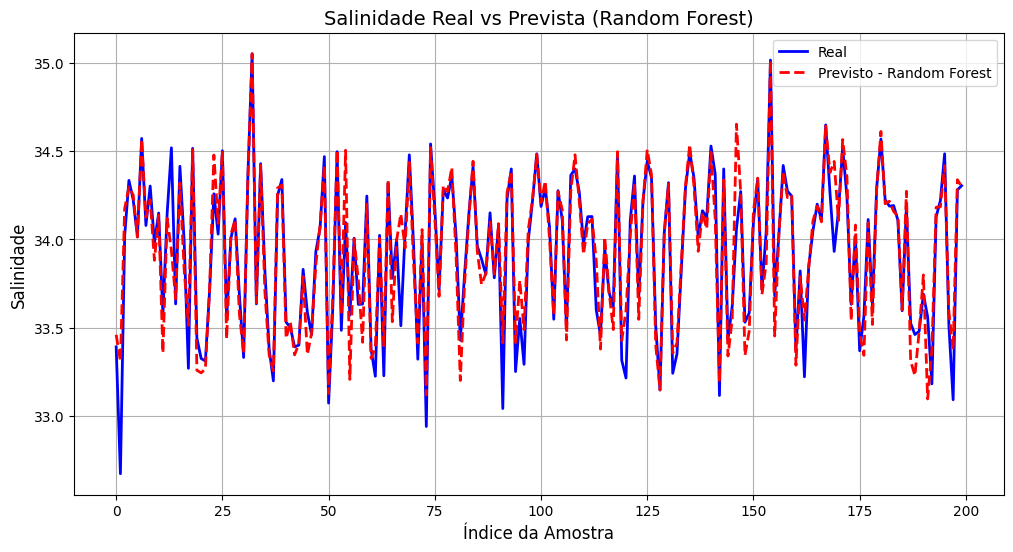

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:200], label="Real", color="blue", linewidth=2)  # valores reais (peguei só 200 p/ não poluir)
plt.plot(y_pred_rf[:200], label="Previsto - Random Forest", color="red", linestyle="--", linewidth=2)

plt.title("Salinidade Real vs Prevista (Random Forest)", fontsize=14)
plt.xlabel("Índice da Amostra", fontsize=12)
plt.ylabel("Salinidade", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

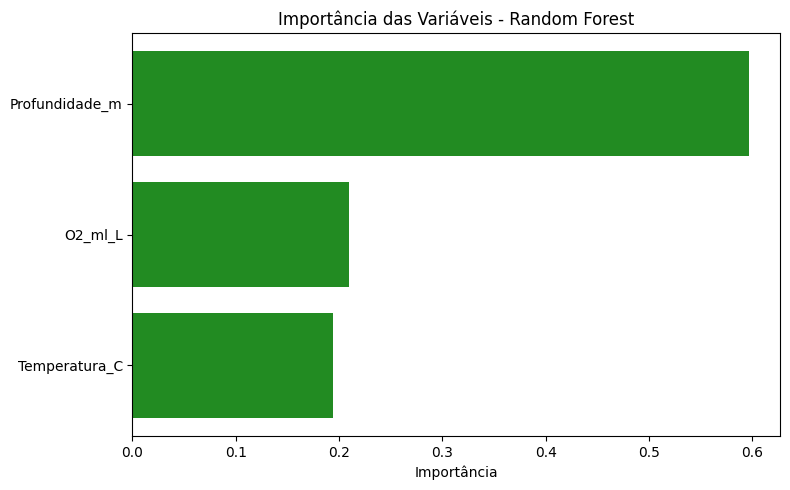

In [48]:
# Importância das variáveis no random forest
importancias = rf.feature_importances_
variaveis = X_train_m.columns

df_importancia = pd.DataFrame({'Variável': variaveis, 'Importância': importancias})
df_importancia = df_importancia.sort_values(by='Importância', ascending=True)

plt.figure(figsize=(8,5))
plt.barh(df_importancia['Variável'], df_importancia['Importância'], color='forestgreen')
plt.xlabel("Importância")
plt.title("Importância das Variáveis - Random Forest")
plt.tight_layout()
plt.show()


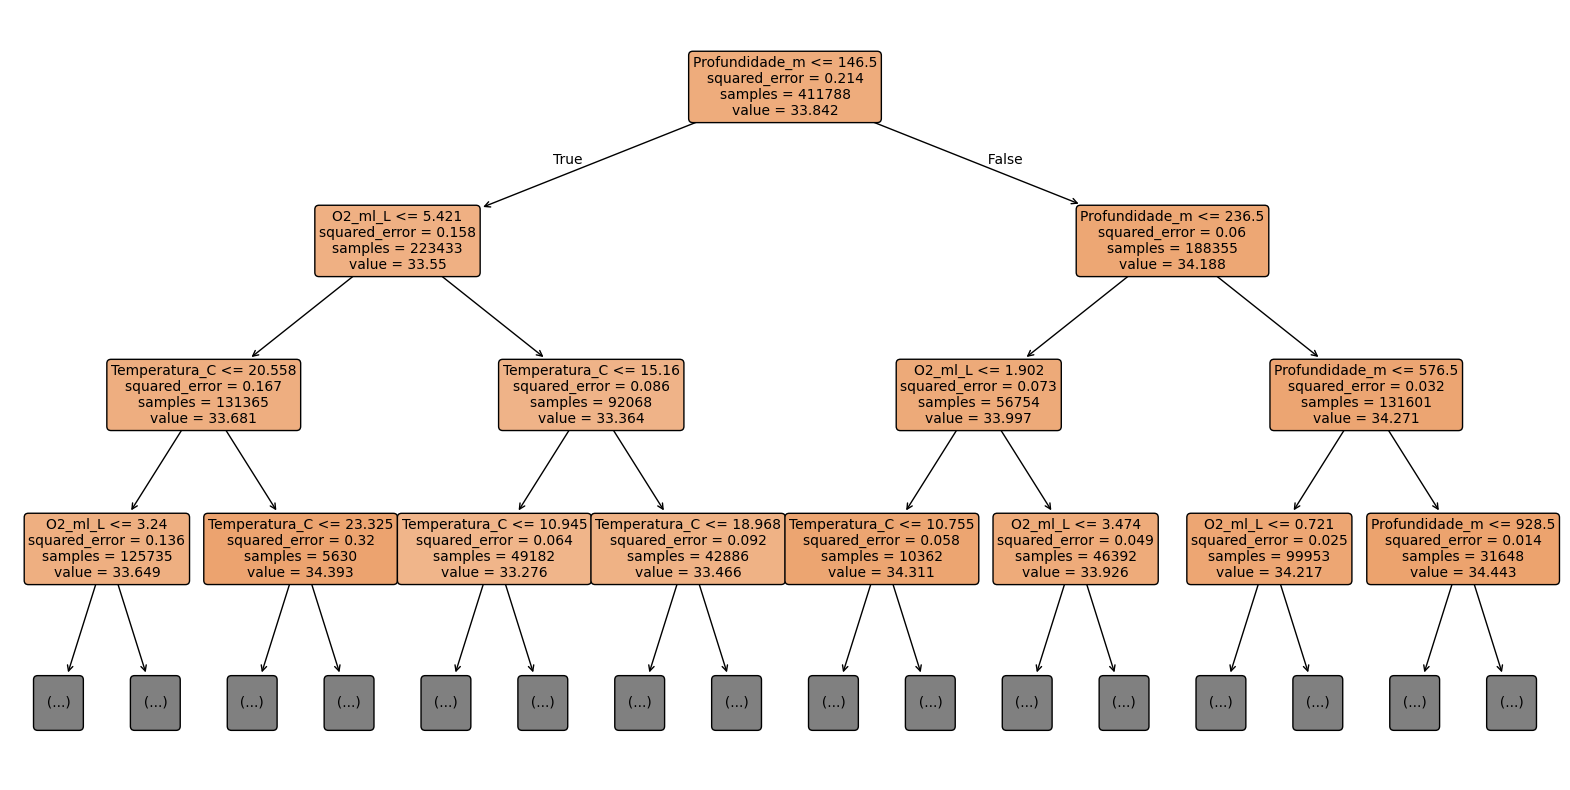

In [52]:
from sklearn.tree import plot_tree

arvore = rf.estimators_[0]  # pega a primeira árvore da floresta

plt.figure(figsize=(20, 10))
plot_tree(
    arvore,
    feature_names=X_multiple.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # só mostra até a profundidade 3 p/ ficar legível
)
plt.show()


O estudo mostrou que a salinidade é influenciada por diversos fatores ambientais e que modelos lineares não capturam bem essas relações. O Random Forest apresentou o melhor desempenho (R² ≈ 0,81; RMSE ≈ 0,20), confirmando a eficácia de modelos não-lineares para esse tipo de análise.